# Tarea semanal 8

#### Franco Ruggiero

1) Realizar el ejercicio 4 del TP5 de Filtros digitales.




  <img src="Enunciado_a.png" style="width:600px ; height:420px">

> <img src="Desarrollo_a1.jpg" style="width:700px ; height:300px">
> <img src="Desarrollo_a2.jpg" style="width:700px ; height:900px">


<img src="Enunciado_a2.png" style="width:400px ; height:100px">

In [4]:
import sympy as sp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import math

# Gráficos interactivos
# %matplotlib ipympl
# %matplotlib qt
# Gráficos estáticos
# %matplotlib inline

from pytc2.sistemas_lineales import group_delay, analyze_sys, plot_plantilla
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

from sympy import symbols, Matrix
from sympy import init_printing

from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot


def plot_freq_resp_fir(this_num, this_desc):

    wrad, hh = sig.freqz(this_num, 1.0)
    ww = wrad / np.pi
    
    plt.figure(1)

    plt.plot(ww, 20 * np.log10(abs(hh)), label=this_desc)

    # plt.title('FIR diseñado por métodos directos - Taps:' + str(cant_coef) )
    plt.xlabel('Frequencia normalizada')
    plt.ylabel('Modulo [dB]')
    plt.grid(which='both', axis='both')

    axes_hdl = plt.gca()
    axes_hdl.legend()
    
    plt.figure(2)

    phase = np.unwrap(np.angle(hh))

    plt.plot(ww, phase, label=this_desc)

    # plt.title('FIR diseñado por métodos directos - Taps:' + str(cant_coef))
    plt.xlabel('Frequencia normalizada')
    plt.ylabel('Fase [rad]')
    plt.grid(which='both', axis='both')

    axes_hdl = plt.gca()
    axes_hdl.legend()

    plt.figure(3)

    # ojo al escalar Omega y luego calcular la derivada.
    gd_win = group_delay(wrad, phase)

    plt.plot(ww, gd_win, label=this_desc)

    plt.ylim((np.min(gd_win[2:-2])-1, np.max(gd_win[2:-2])+1))
    # plt.title('FIR diseñado por métodos directos - Taps:' + str(cant_coef))
    plt.xlabel('Frequencia normalizada')
    plt.ylabel('Retardo [# muestras]')
    plt.grid(which='both', axis='both')

    axes_hdl = plt.gca()
    axes_hdl.legend()   

<img src="Enunciado1_b.png" style="width:700px ; height:250px">

> <img src="1_b1.jpg" style="width:700px ; height:900px">
> <img src="1_b2.jpg" style="width:650px ; height:750px">
> <img src="1_b3.jpg" style="width:700px ; height:900px">
> <img src="1_b4.jpg" style="width:700px ; height:900px">
> <img src="1_b5.jpg" style="width:700px ; height:850px">





> 2) Los filtros IIR suelen ser de mínima fase y requieren menos coeficientes para lograr un efecto similar al de los filtros FIR, lo que les permite ser más eficientes en términos de uso de recursos. Sin embargo, los filtros FIR tienen la ventaja de ser más estables y ofrecen una mejor respuesta en fase, además de un menor tiempo de cálculo en algunos casos.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

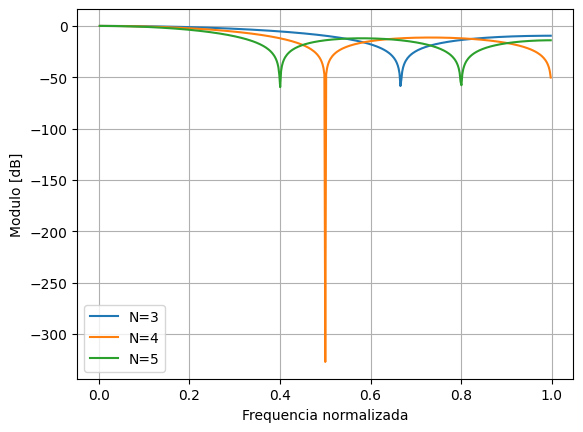

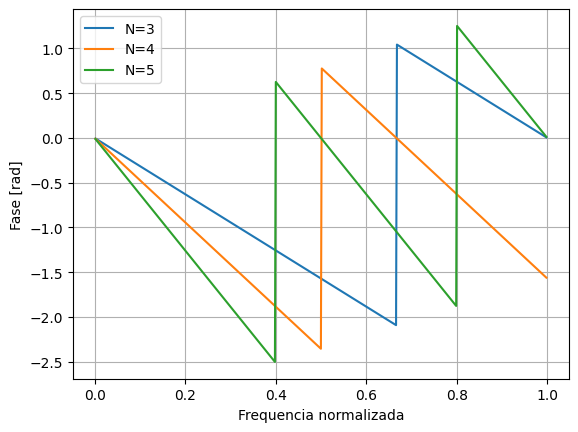

In [9]:
##############################################################################
#
# FILTRO DE MEDIA MOVIL
#
##############################################################################

plt.close('all')

all_sys = []
all_sys_desc = []

w0 = 1
qq1 = np.sqrt(2)/2


# Definimos la variable Z
z = sp.symbols('z')

# Valores de N
N_values = ([3, 4, 5])

# Definir la función de transferencia para cada valor de N
for N in N_values:    
    a0 = 1
    a1 = 1
    a2 = 0

    b0 = 1 / N
    b1 = 0
    b2 = 0

    c1 = 1
    
    n = sp.expand(1 - c1 * z**(-N)) * (b0*(z*z) + b1*z + b2) 
    D = sp.expand(z*z / a0 - a1*z - a2)
    
    H_simplified = sp.simplify(n/D)
    
    
    print_latex(a_equal_b_latex_s('H', H_simplified))
    
    num, den = sp.fraction(H_simplified)

    num = sp.Poly(num,z)
    den = sp.Poly(den,z)
    
    numz = np.array(num.all_coeffs()).astype(np.float64)
    denz = np.array(den.all_coeffs()).astype(np.float64)

    my_df = sig.TransferFunction(numz, denz, dt=1/N)

# my_tf3 = TransferFunction( [1/3 , 0 , 0 , -1/3]       , [1, -1, 0, 0])
# my_tf4 = TransferFunction( [1/4 , 0 , 0 , 0, -1/4]    , [1, -1, 0, 0, 0])
# my_tf5 = TransferFunction( [1/5 , 0 , 0 , 0, 0, -1/5] , [1, -1, 0, 0, 0, 0])

# _= analyze_sys([my_tf3], sys_name='H(z) N=3') 
# _= analyze_sys([my_tf4], sys_name='H(z) N=4') 
# _= analyze_sys([my_tf5], sys_name='H(z) N=5') 

numN3 = [1/3 , 0 , 0 , -1/3] 
numN4 = [1/4 , 0 , 0 , 0 , -1/4] 
numN5 = [1/5 , 0 , 0 , 0 , 0 , -1/5] 
den = [1 , -1]

wrad3, hh3 = sig.freqz(numN3, den)
ww3 = wrad3 / np.pi

wrad4, hh4 = sig.freqz(numN4, den)
ww4 = wrad4 / np.pi

wrad5, hh5 = sig.freqz(numN5, den)
ww5 = wrad5 / np.pi

# Modulo
plt.figure(1)
plt.plot(ww3, 20 * np.log10(abs(hh3)), label='N=3')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')
axes_hdl = plt.gca()
axes_hdl.legend()

plt.plot(ww4, 20 * np.log10(abs(hh4)), label='N=4')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')
axes_hdl = plt.gca()
axes_hdl.legend()

plt.plot(ww5, 20 * np.log10(abs(hh5)), label='N=5')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')
axes_hdl = plt.gca()
axes_hdl.legend()

# fase
plt.figure(2)
phase3 = np.angle(hh3)
plt.plot(ww3, phase3, label='N=3')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase [rad]')
plt.grid(which='both', axis='both')

phase4 = np.angle(hh4)
plt.plot(ww4, phase4, label='N=4')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase [rad]')
plt.grid(which='both', axis='both')
axes_hdl = plt.gca()
axes_hdl.legend()

phase5 = np.angle(hh5)
plt.plot(ww5, phase5, label='N=5')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase [rad]')
plt.grid(which='both', axis='both')
axes_hdl = plt.gca()
axes_hdl.legend()

<img src="Enunciado1_c.png" style="width:600px ; height:100px">

> <img src="c_a'.jpg" style="width:700px ; height:850px">
> <img src="c_b'.jpg" style="width:700px ; height:850px">

/tmp/ipykernel_9667/4195692399.py:33: RuntimeWarning: divide by zero encountered in log10
  plt.plot(ww, 20 * np.log10(abs(hh)), label=this_desc)


(5, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

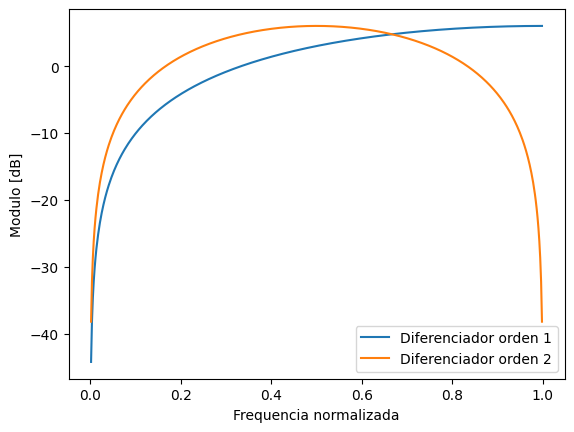

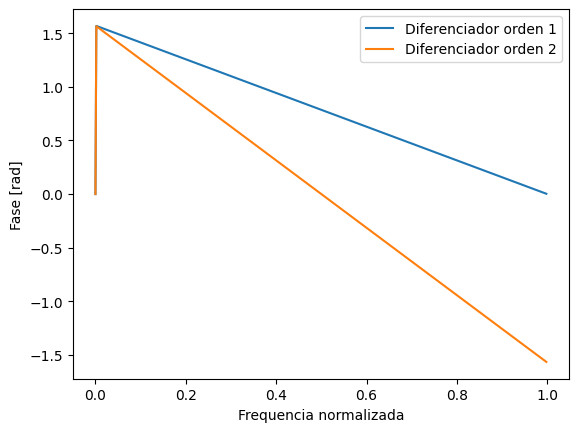

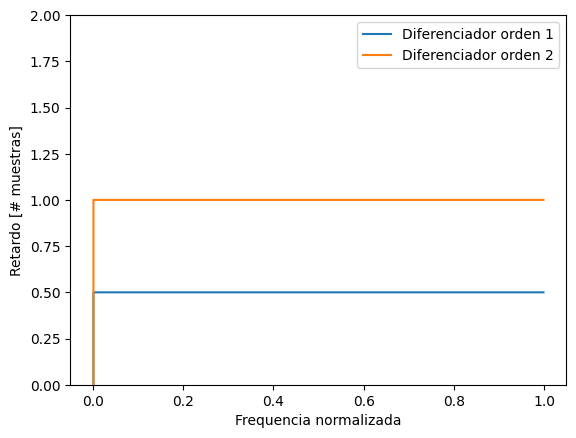

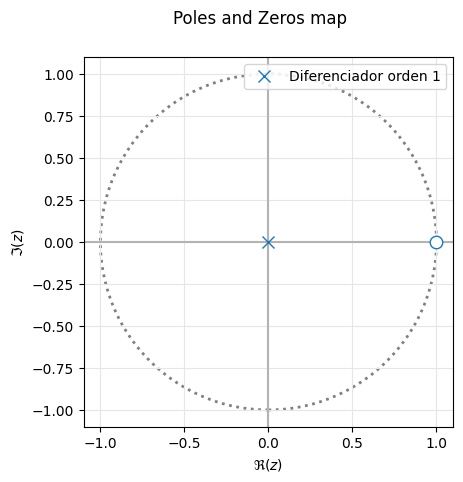

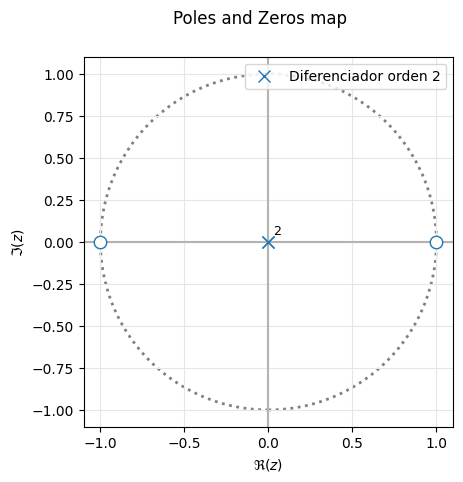

In [57]:
##############################################################################
# 
# FILTRO DIFERENCIADOR
# 
# ##############################################################################\

# %matplotlib inline
plt.close('all')

num1z = np.array([1, -1])
num2z = np.array([1, 0, -1])

plot_freq_resp_fir(num1z, 'Diferenciador orden 1')
plot_freq_resp_fir(num2z, 'Diferenciador orden 2')


tf_pzmap1 = sig.TransferFunction( [1 , -1] , [1 , 0] , dt=1/2)
tf_pzmap2 = sig.TransferFunction( [1 , 0 , -1] , [1 , 0 , 0] , dt=1/2)
pzmap(tf_pzmap1, annotations=False, filter_description='Diferenciador orden 1', fig_id='none', axes_hdl='none', digital=True)
pzmap(tf_pzmap2, annotations=False, filter_description='Diferenciador orden 2', fig_id='none', axes_hdl='none', digital=True)


<img src="Enunciado1_d.png" style="width:600px ; height:100px">

> <img src="1_d.jpg" style="width:700px ; height:850px">

(4, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

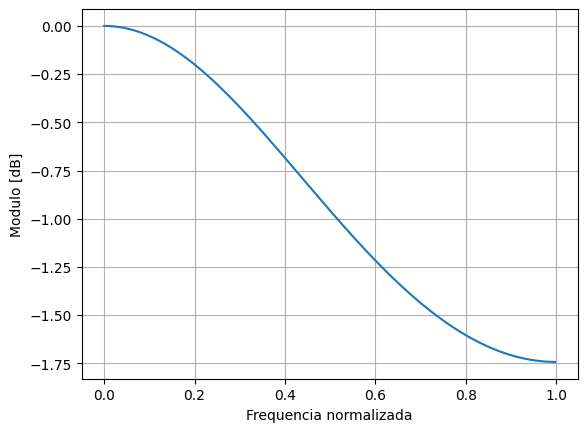

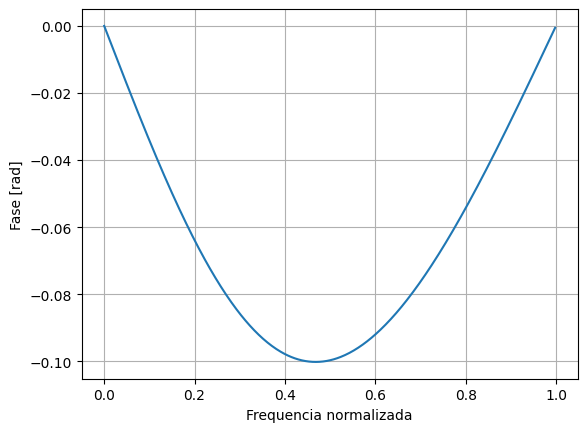

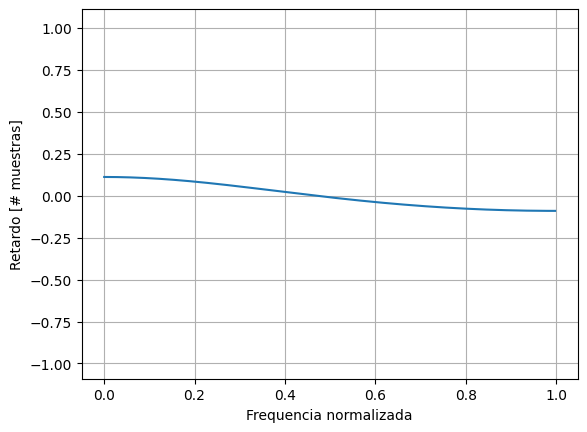

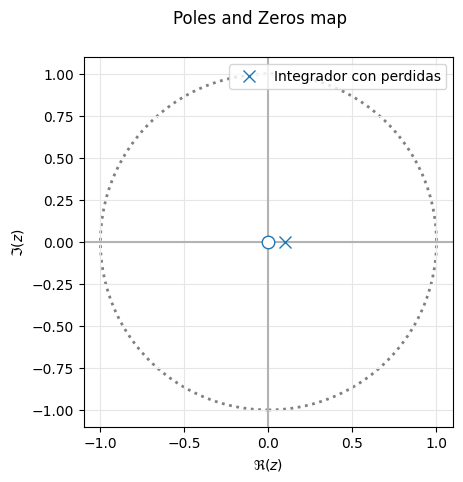

In [52]:
##############################################################################
# 
# FILTRO INTEGRADOR CON PERDIDAS
# 
##############################################################################

plt.close('all')

this_desc = 'Integrador con perdidas'

alpha = 0.9

numd = alpha
dend = [1, -(1-alpha)]

wrad, hh = sig.freqz(numd, dend)
ww = wrad / np.pi
    
plt.figure(1)
plt.plot(ww, 20 * np.log10(abs(hh)), label=this_desc)
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')
    
plt.figure(2)
phase = np.unwrap(np.angle(hh))

plt.plot(ww, phase, label=this_desc)

plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase [rad]')
plt.grid(which='both', axis='both')

plt.figure(3)

# ojo al escalar Omega y luego calcular la derivada.
gd_win = group_delay(wrad, phase)

plt.plot(ww, gd_win, label=this_desc)

plt.ylim((np.min(gd_win[2:-2])-1, np.max(gd_win[2:-2])+1))
plt.xlabel('Frequencia normalizada')
plt.ylabel('Retardo [# muestras]')
plt.grid(which='both', axis='both')


# Diagrama de polos y ceros
tf_pzmap = sig.TransferFunction( [alpha , 0] , [1 , -(1-alpha)] , dt=1/2)
pzmap(tf_pzmap, annotations=False, filter_description='Integrador con perdidas', fig_id='none', axes_hdl='none', digital=True)


<img src="Enunciado1_e.png" style="width:600px ; height:100px">

> <img src="1_e.jpg" style="width:700px ; height:850px">

/tmp/ipykernel_9667/4076171570.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.plot(ww, 20 * np.log10(abs(hh)), label=this_desc)


(4, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

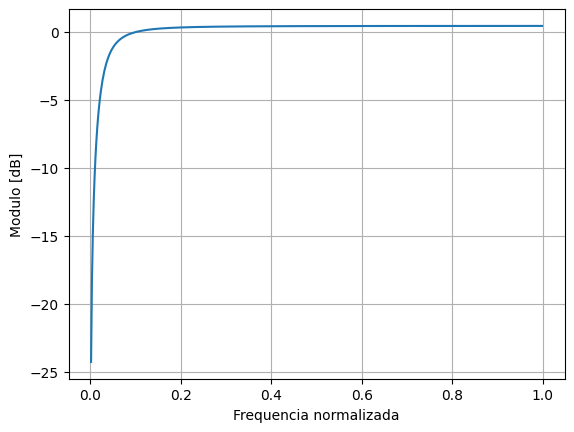

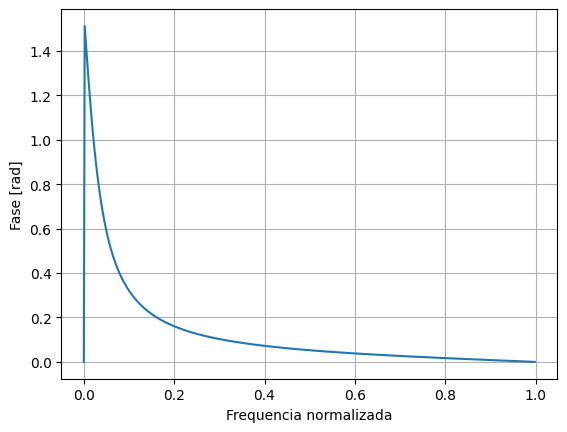

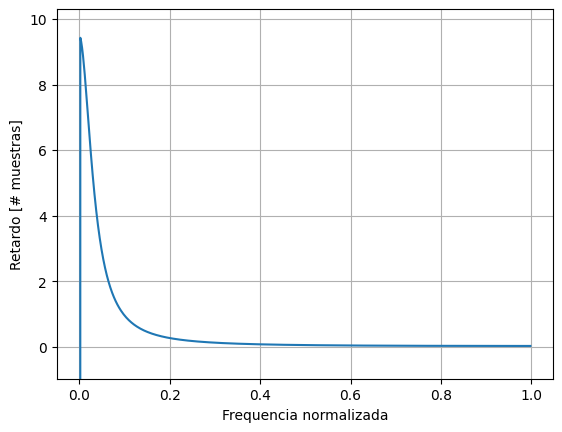

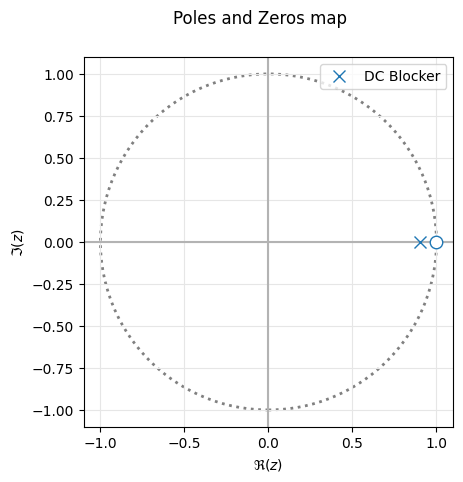

In [45]:
##############################################################################
# 
# FILTRO ELIMINA CONTINUA (DC BLOCKER)
# 
##############################################################################

plt.close('all')

this_desc = 'DC Blocker'

alpha = 0.9

numz = [1 , -1]
denz = [1, -alpha]

wrad, hh = sig.freqz(numz, denz)
ww = wrad / np.pi
    
plt.figure(1)
plt.plot(ww, 20 * np.log10(abs(hh)), label=this_desc)
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')
    
plt.figure(2)
phase = np.unwrap(np.angle(hh))

plt.plot(ww, phase, label=this_desc)

plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase [rad]')
plt.grid(which='both', axis='both')

plt.figure(3)

# ojo al escalar Omega y luego calcular la derivada.
gd_win = group_delay(wrad, phase)

plt.plot(ww, gd_win, label=this_desc)

plt.ylim((np.min(gd_win[2:-2])-1, np.max(gd_win[2:-2])+1))
plt.xlabel('Frequencia normalizada')
plt.ylabel('Retardo [# muestras]')
plt.grid(which='both', axis='both')


# Diagrama de polos y ceros
tf_pzmap = sig.TransferFunction( [1 , -1] , [1 , -alpha] , dt=1/2)
pzmap(tf_pzmap, annotations=False, filter_description=this_desc, fig_id='none', axes_hdl='none', digital=True)


<img src="Enunciado1_f.png" style="width:720px ; height:190px">

> <img src="1_f'.jpg" style="width:700px ; height:850px">

In [ ]:
##############################################################################
# 
# FILTRO ECUALIZADOR
# 
##############################################################################

plt.close('all')

this_desc = 'DC Blocker'

alpha = 0.9

numz = [1 , -1]
denz = [1, -alpha]

wrad, hh = sig.freqz(numz, denz)
ww = wrad / np.pi
    
plt.figure(1)
plt.plot(ww, 20 * np.log10(abs(hh)), label=this_desc)
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')
    
plt.figure(2)
phase = np.unwrap(np.angle(hh))

plt.plot(ww, phase, label=this_desc)

plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase [rad]')
plt.grid(which='both', axis='both')

plt.figure(3)

# ojo al escalar Omega y luego calcular la derivada.
gd_win = group_delay(wrad, phase)

plt.plot(ww, gd_win, label=this_desc)

plt.ylim((np.min(gd_win[2:-2])-1, np.max(gd_win[2:-2])+1))
plt.xlabel('Frequencia normalizada')
plt.ylabel('Retardo [# muestras]')
plt.grid(which='both', axis='both')


# Diagrama de polos y ceros
tf_pzmap = sig.TransferFunction( [1 , -1] , [1 , -alpha] , dt=1/2)
pzmap(tf_pzmap, annotations=False, filter_description=this_desc, fig_id='none', axes_hdl='none', digital=True)


2) Se dispone del siguiente filtro digital:
   <center><img src="image1.png" style="width:300px ; height:200px"><center>

- a) Para la transferencia del filtro con M = 2 y α=0.8; calcular 1) el diagrama de polos y ceros y la respuesta en frecuencia de 2) módulo, 3) fase y 4) retardo de grupo.

- b) Si quisiéramos anular una senoidal interferente de 125 Hz y su armónica de 375 Hz y sólo dispone de un sumador y el filtro de la figura con M = 4. Proponga un esquema de la solución y calcule los parámetros del filtro que sería necesario adecuar.



a)

> <img src="2_a1.jpg" style="width:700px ; height:800px">
> <img src="2_a2.jpg" style="width:700px ; height:800px">

<IPython.core.display.Math object>

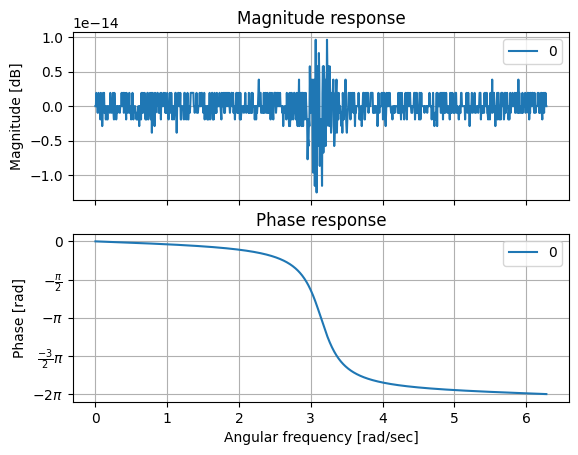

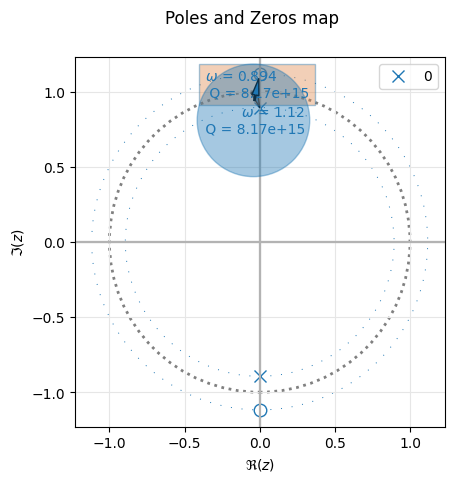

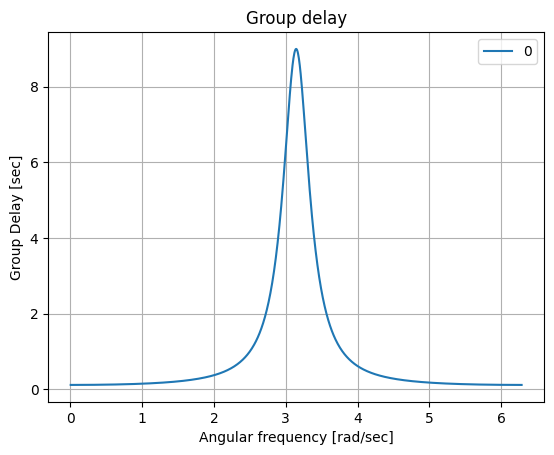

In [154]:
##############################################################################
# 
# 2 a)
# 
##############################################################################
# %matplotlib inline

alpha = 0.8
M = 2

# my_tf_2a = TransferFunction( [1 , -1] , [1 , -alpha] )
# _= analyze_sys([my_tf_2a], sys_name='DC Bocker') 

z = sp.symbols('z')

N2 = sp.expand( alpha * z**M + 1 ) 
D2 = sp.expand( z**M + alpha )
    
H_simplified_2 = sp.simplify(N2/D2)

print_latex(a_equal_b_latex_s('H(z)', H_simplified_2))
    
num2, den2 = sp.fraction(H_simplified_2)

num2 = sp.Poly(num2,z)
den2 = sp.Poly(den2,z)
    
numz2 = np.array(num2.all_coeffs()).astype(np.float64)
denz2 = np.array(den2.all_coeffs()).astype(np.float64)

my_df2 = sig.TransferFunction(numz2, denz2, dt=1/2)

_= analyze_sys([my_df2]) 
